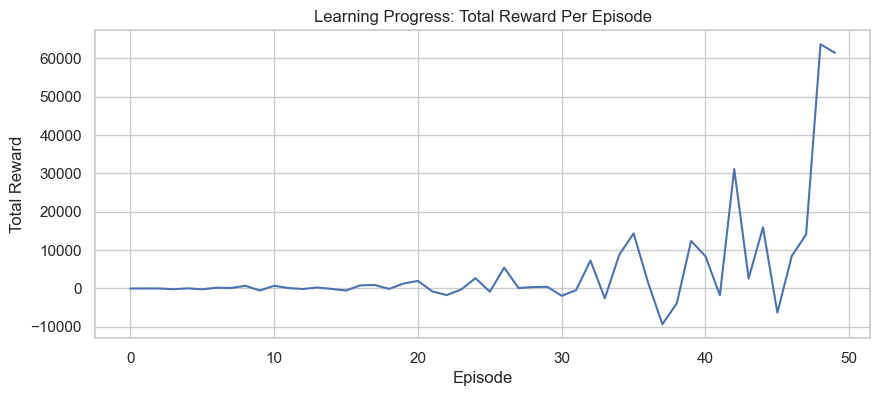

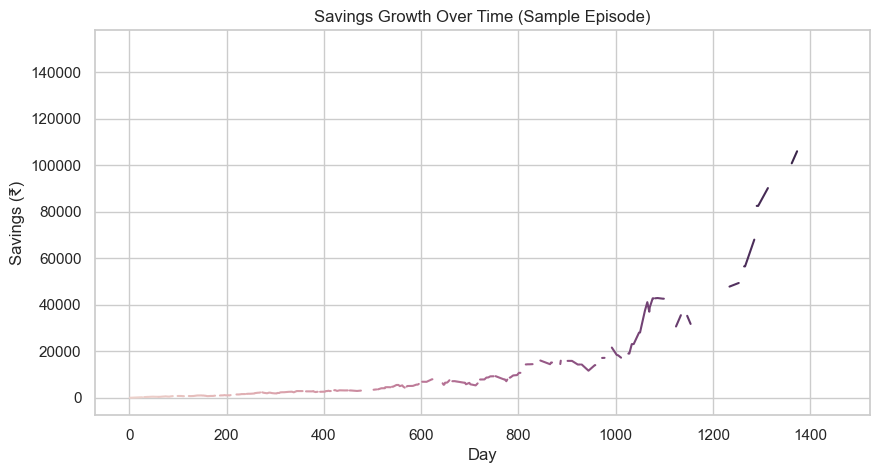

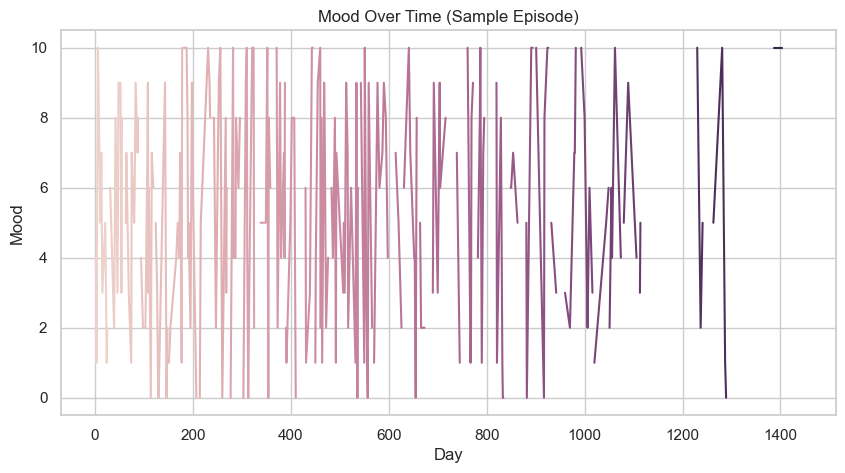


Sample Episode Log:
   day  budget  savings  debt  streak  mood  \
0    0     950      0.0     0       0     2   
1    1     950      0.0     0       0     4   
2    2     950      0.0     0       0     4   
3    3     919      0.0     0       0     1   
4    4     885     34.0     0       1     4   
5    5     835     34.0     0       0     3   
6    6     823     46.0     0       1    10   
7    7     800     69.0     0       2    10   
8    8     800     69.0     0       0    10   
9    9     800     69.0     0       0     8   

                                      event  reward  episode  
0  Random Event: Economic condition changed   -50.0        0  
1                   Investment grew by ₹0.0     0.0        0  
2                         No debt to handle     0.0        0  
3                                 Spent ₹31   -15.5        0  
4                                 Saved ₹34    17.0        0  
5  Random Event: Economic condition changed   -50.0        0  
6                   

In [20]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Game Setup - Agent Class
class BudgetAgent:
    def __init__(self, budget=1000, savings=0, mood=5, debt=0, streak=0):
        self.budget = budget  # Initial budget
        self.savings = savings  # Initial savings
        self.mood = mood  # Mood of the agent (0 to 10)
        self.debt = debt  # Initial debt
        self.streak = streak  # Streak for saving money
        self.history = []  # Track the agent's actions
        self.episode = 0  # Track the episode number
        self.time = 0  # Track the current time (day/month)

    def take_action(self, action):
        """
        Action can be:
        0 -> Spend Money
        1 -> Save Money
        2 -> Invest
        3 -> Handle Debt
        4 -> Random Event (e.g., economic conditions)
        """
        if action == 0:  # Spend money
            spent_amount = random.randint(20, 100)
            self.budget -= spent_amount
            reward = -spent_amount / 2  # Negative reward for spending money
            event = f"Spent ₹{spent_amount}"
        elif action == 1:  # Save money
            saved_amount = random.randint(10, 50)
            self.savings += saved_amount
            self.budget -= saved_amount
            reward = saved_amount / 2  # Positive reward for saving money
            event = f"Saved ₹{saved_amount}"
        elif action == 2:  # Invest money
            investment = random.choice([0.1, 0.05, -0.1])  # Investment return: +10%, +5%, -10%
            if investment > 0:
                reward = investment * self.savings
                self.savings += reward
                event = f"Investment grew by ₹{reward}"
            else:
                reward = investment * self.savings
                self.savings += reward
                event = f"Investment lost ₹{abs(reward)}"
        elif action == 3:  # Handle debt
            if self.debt > 0:
                repayment = min(self.debt, random.randint(50, 200))  # Repay debt
                self.debt -= repayment
                reward = repayment / 2  # Positive reward for repaying debt
                event = f"Repayed ₹{repayment} of debt"
            else:
                reward = 0
                event = "No debt to handle"
        else:  # Random event (economic conditions, mood)
            event = "Random Event: Economic condition changed"
            reward = random.choice([-50, 50])  # Positive or negative economic impact
            self.budget += reward

        # Adjust mood and streak based on actions
        self.mood = random.randint(0, 10)  # Random mood change
        self.streak = self.streak + 1 if action == 1 else 0  # Increase streak if saving money

        # Track the actions and results
        self.history.append({
            'day': self.time,
            'budget': self.budget,
            'savings': self.savings,
            'debt': self.debt,
            'streak': self.streak,
            'mood': self.mood,
            'event': event,
            'reward': reward,
            'episode': self.episode
        })
        self.time += 1

# Simulation Function - Reinforcement Learning Simulation
def train_agent(episodes=50):
    agent = BudgetAgent()  # Create a new agent
    rewards = []  # Track the total rewards for each episode
    history_df = pd.DataFrame()  # Store the history of actions in the simulation

    for episode in range(episodes):
        agent.episode = episode  # Set the current episode
        total_reward = 0  # Track the total reward for this episode
        for day in range(30):  # Simulate 30 days per episode
            action = random.choice([0, 1, 2, 3, 4])  # Random action: spend, save, invest, handle debt, or random event
            agent.take_action(action)  # Agent takes action
            total_reward += agent.history[-1]['reward']  # Add reward from this action

        rewards.append(total_reward)  # Save the total reward for the episode
        history_df = pd.concat([history_df, pd.DataFrame(agent.history)], ignore_index=True)  # Append the episode data

    return rewards, history_df

# Visualization Function - Display Results
def visualize_results(rewards, history_df):
    sns.set(style="whitegrid")
    
    # Total Reward per Episode (Learning Progress)
    plt.figure(figsize=(10, 4))
    plt.title("Learning Progress: Total Reward Per Episode")
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

    # Savings Growth Over Time (Sample)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='savings', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Savings Growth Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Savings (₹)")
    plt.show()

    # Mood Over Time (Sample Episode)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='mood', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Mood Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Mood")
    plt.show()

    # Display Sample Episode Log (First 10 Days of Episode 0)
    print("\nSample Episode Log:")
    print(history_df[history_df['episode'] == 0].head(10))

# Run the Simulation and Visualize Results
rewards, history_df = train_agent(episodes=50)
visualize_results(rewards, history_df)


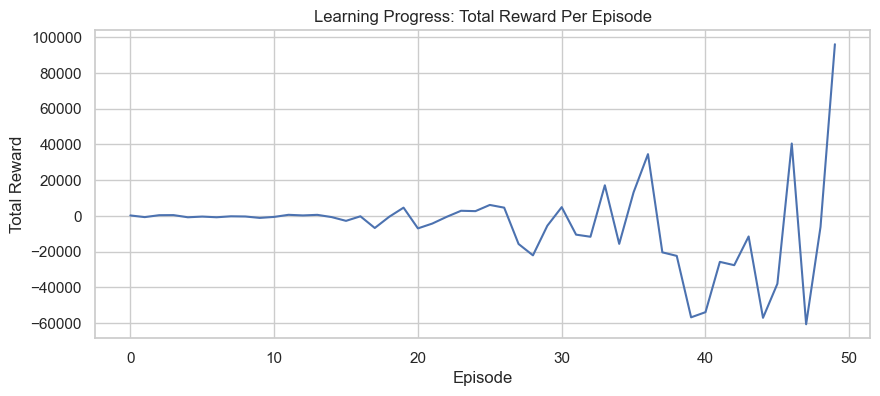

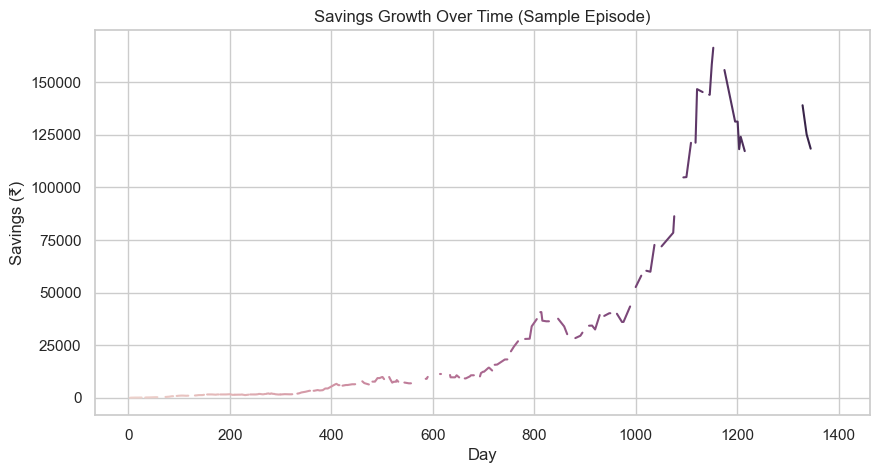

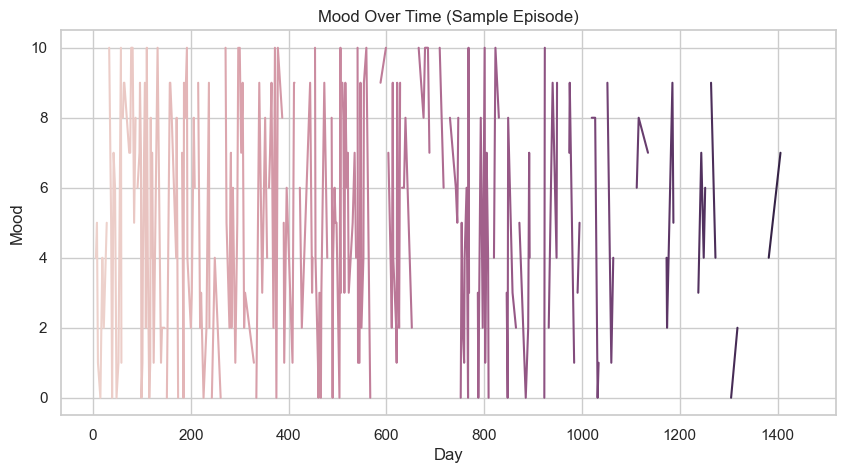


Sample Episode Log:
   day  budget  savings  debt  streak  mood  \
0    0     987    13.00     0       1     5   
1    1     976    24.00     0       2     0   
2    2     951    24.00     0       0     9   
3    3     951    24.00     0       0     6   
4    4     951    21.60     0       0    10   
5    5     912    60.60     0       1     9   
6    6     962    60.60     0       0     4   
7    7     866    60.60     0       0     7   
8    8     866    66.66     0       0     5   
9    9     866    66.66     0       0     6   

                                       event  reward  episode  
0  Saved ₹13. Reward will be received later.    6.50        0  
1  Saved ₹11. Reward will be received later.    0.00        0  
2                                  Spent ₹25  -37.50        0  
3                          No debt to handle    0.00        0  
4        Investment lost ₹2.4000000000000004   -4.80        0  
5  Saved ₹39. Reward will be received later.   19.50        0  
6            

In [21]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Game Setup - Agent Class
class BudgetAgent:
    def __init__(self, budget=1000, savings=0, mood=5, debt=0, streak=0):
        self.budget = budget  # Initial budget
        self.savings = savings  # Initial savings
        self.mood = mood  # Mood of the agent (0 to 10)
        self.debt = debt  # Initial debt
        self.streak = streak  # Streak for saving money
        self.history = []  # Track the agent's actions
        self.episode = 0  # Track the episode number
        self.time = 0  # Track the current time (day/month)

    def take_action(self, action):
        """
        Action can be:
        0 -> Spend Money
        1 -> Save Money
        2 -> Invest
        3 -> Handle Debt
        4 -> Random Event (e.g., economic conditions, windfall)
        """
        if action == 0:  # Spend money
            spent_amount = random.randint(20, 100)
            self.budget -= spent_amount
            reward = -spent_amount * 1.5  # Loss aversion: Greater penalty for spending
            event = f"Spent ₹{spent_amount}"

        elif action == 1:  # Save money (Delayed gratification)
            saved_amount = random.randint(10, 50)
            self.savings += saved_amount
            self.budget -= saved_amount
            reward = 0  # No immediate reward for saving (Delayed Gratification)
            event = f"Saved ₹{saved_amount}. Reward will be received later."
            # Reward is delayed after a certain number of days (simulating delayed gratification)
            if self.time % 5 == 0:  # Every 5 days, the agent receives the reward from saving
                reward += saved_amount / 2  # Positive reward for saving

        elif action == 2:  # Invest money
            investment = random.choice([0.1, 0.05, -0.1])  # Investment return: +10%, +5%, -10%
            if investment > 0:
                reward = investment * self.savings
                self.savings += reward
                event = f"Investment grew by ₹{reward}"
            else:
                reward = investment * self.savings
                self.savings += reward
                event = f"Investment lost ₹{abs(reward)}"
                reward *= 2  # Loss aversion: Amplify the negative impact of losses

        elif action == 3:  # Handle debt
            if self.debt > 0:
                repayment = min(self.debt, random.randint(50, 200))  # Repay debt
                self.debt -= repayment
                reward = repayment / 2  # Positive reward for repaying debt
                event = f"Repayed ₹{repayment} of debt"
            else:
                reward = 0
                event = "No debt to handle"

        else:  # Random event (economic conditions, windfall)
            event_type = random.choice(["bonus", "economic_change"])
            if event_type == "bonus":
                bonus = random.randint(100, 500)
                self.budget += bonus
                reward = bonus / 2  # Positive reward for getting a bonus
                event = f"Received a bonus of ₹{bonus}. Mental accounting leads to more spending."
                # Mental Accounting: Treat bonus money as extra spending money
                if random.random() < 0.7:  # 70% chance of spending bonus
                    self.budget -= bonus  # Spend the bonus on unnecessary purchases
                    event += f" Spent ₹{bonus} from bonus."

            else:
                event = "Economic condition changed"
                reward = random.choice([-50, 50])  # Economic conditions can improve or worsen
                self.budget += reward

        # Adjust mood and streak based on actions
        self.mood = random.randint(0, 10)  # Random mood change
        self.streak = self.streak + 1 if action == 1 else 0  # Increase streak if saving money

        # Status Quo Bias: Default action is to save (avoid risky actions)
        if random.random() < 0.7:  # 70% chance to stick to the status quo (saving)
            action = 1  # Prefer saving over spending or investing

        # Track the actions and results
        self.history.append({
            'day': self.time,
            'budget': self.budget,
            'savings': self.savings,
            'debt': self.debt,
            'streak': self.streak,
            'mood': self.mood,
            'event': event,
            'reward': reward,
            'episode': self.episode
        })
        self.time += 1

# Simulation Function - Reinforcement Learning Simulation
def train_agent(episodes=50):
    agent = BudgetAgent()  # Create a new agent
    rewards = []  # Track the total rewards for each episode
    history_df = pd.DataFrame()  # Store the history of actions in the simulation

    for episode in range(episodes):
        agent.episode = episode  # Set the current episode
        total_reward = 0  # Track the total reward for this episode
        for day in range(30):  # Simulate 30 days per episode
            action = random.choice([0, 1, 2, 3, 4])  # Random action: spend, save, invest, handle debt, or random event
            agent.take_action(action)  # Agent takes action
            total_reward += agent.history[-1]['reward']  # Add reward from this action

        rewards.append(total_reward)  # Save the total reward for the episode
        history_df = pd.concat([history_df, pd.DataFrame(agent.history)], ignore_index=True)  # Append the episode data

    return rewards, history_df

# Visualization Function - Display Results
def visualize_results(rewards, history_df):
    sns.set(style="whitegrid")
    
    # Total Reward per Episode (Learning Progress)
    plt.figure(figsize=(10, 4))
    plt.title("Learning Progress: Total Reward Per Episode")
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

    # Savings Growth Over Time (Sample)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='savings', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Savings Growth Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Savings (₹)")
    plt.show()

    # Mood Over Time (Sample Episode)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='mood', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Mood Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Mood")
    plt.show()

    # Display Sample Episode Log (First 10 Days of Episode 0)
    print("\nSample Episode Log:")
    print(history_df[history_df['episode'] == 0].head(10))

# Run the Simulation and Visualize Results
rewards, history_df = train_agent(episodes=50)
visualize_results(rewards, history_df)


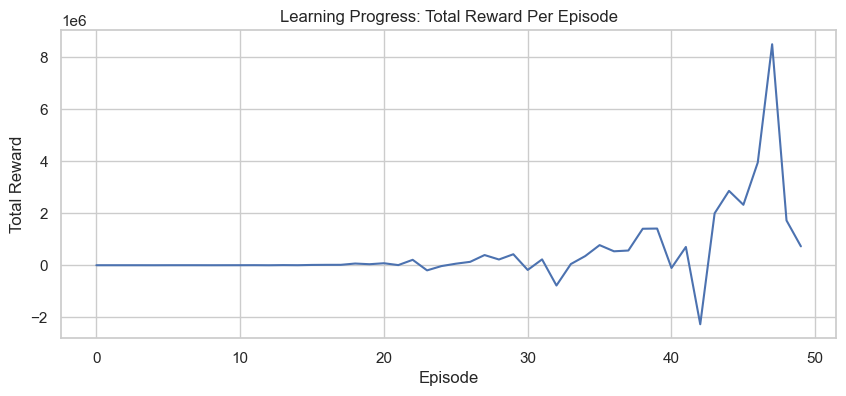

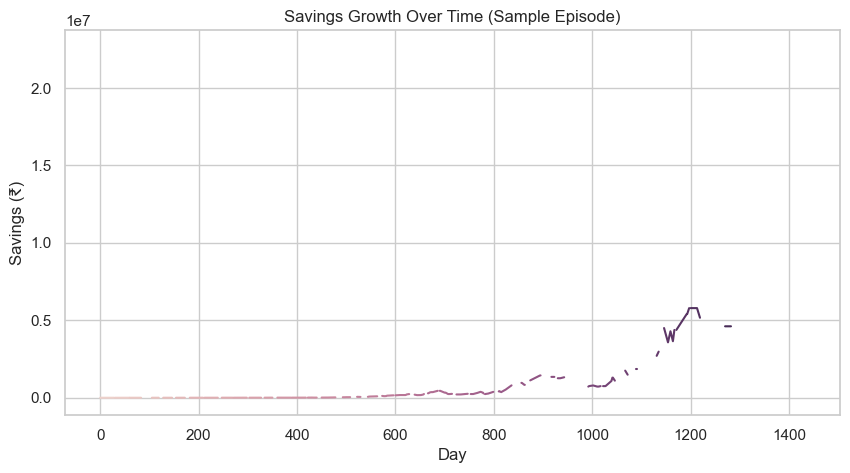

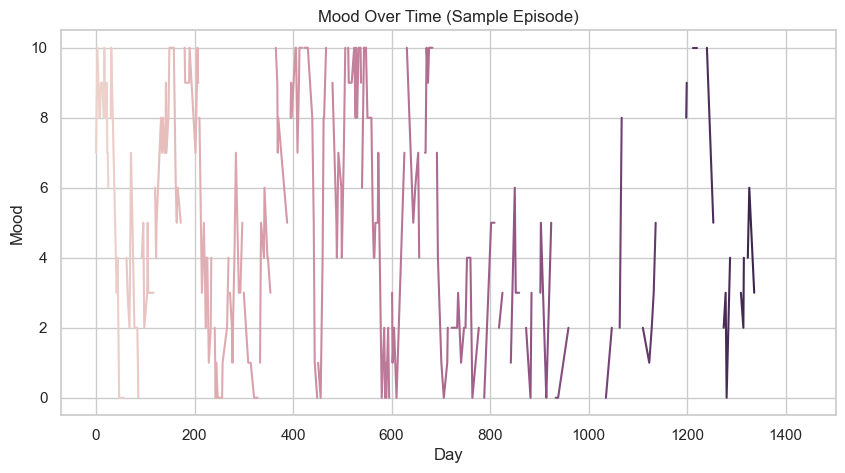

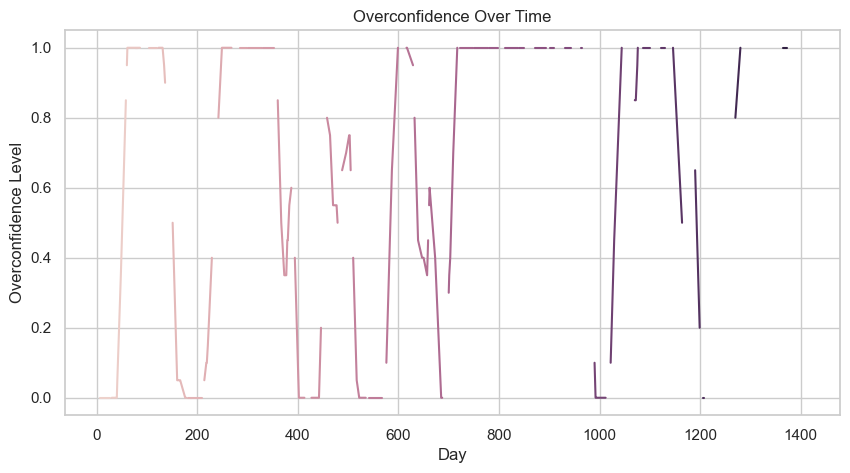


Sample Episode Log:
   day  budget  savings  debt  streak  mood  \
0    0  1000.0      0.0     0       0     7   
1    1   976.0      0.0     0       0     9   
2    2   944.0      0.0     0       0    10   
3    3   944.0      0.0     0       0    10   
4    4   894.0      0.0     0       0    10   
5    5   894.0      0.0     0       0    10   
6    6   800.0      0.0     0       0    10   
7    7   777.0     23.0     0       1     8   
8    8   750.0     50.0     0       2     8   
9    9   700.0     50.0     0       0    10   

                                      event  reward  episode  overconfidence  
0                      Investment lost ₹0.0     0.0        0             0.0  
1                                 Spent ₹24   -12.0        0             0.0  
2                                 Spent ₹32   -16.0        0             0.0  
3                      Investment lost ₹0.0     0.0        0             0.0  
4  Random Event: Economic condition changed   -50.0        0      

In [22]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Game Setup - Agent Class
class BudgetAgent:
    def __init__(self, budget=1000, savings=0, mood=5, debt=0, streak=0, overconfidence=0):
        self.budget = budget  # Initial budget
        self.savings = savings  # Initial savings
        self.mood = mood  # Mood of the agent (0 to 10)
        self.debt = debt  # Initial debt
        self.streak = streak  # Streak for saving money
        self.history = []  # Track the agent's actions
        self.episode = 0  # Track the episode number
        self.time = 0  # Track the current time (day/month)
        self.overconfidence = overconfidence  # Agent's tendency to take financial risks due to overconfidence
        self.financial_goal = random.choice(['save', 'debt-free', 'invest'])  # Long-term goal of the agent

    def take_action(self, action):
        """
        Action can be:
        0 -> Spend Money
        1 -> Save Money
        2 -> Invest
        3 -> Handle Debt
        4 -> Random Event (e.g., economic conditions)
        """
        if action == 0:  # Spend money
            spent_amount = random.randint(20, 100)
            if self.overconfidence > 0.7:  # Overconfident agents may overspend
                spent_amount *= 1.2  # Spend more due to overconfidence
            self.budget -= spent_amount
            reward = -spent_amount / 2  # Negative reward for spending money
            event = f"Spent ₹{spent_amount}"
        elif action == 1:  # Save money
            saved_amount = random.randint(10, 50)
            self.savings += saved_amount
            self.budget -= saved_amount
            reward = saved_amount / 2  # Positive reward for saving money
            event = f"Saved ₹{saved_amount}"
        elif action == 2:  # Invest money
            # Risk-based returns: higher risk investments have larger fluctuations
            risk_factor = random.uniform(0, 1) + self.overconfidence * 0.2  # Overconfidence increases risk-taking
            if risk_factor < 0.5:  # Low risk investment (e.g., bonds)
                investment = random.choice([0.02, 0.05])  # Return on investment (low risk)
            else:  # High-risk investment (e.g., stocks)
                investment = random.choice([0.1, 0.2, -0.15])  # Return on investment (high risk)
            
            reward = investment * self.savings
            self.savings += reward
            if reward > 0:
                event = f"Investment grew by ₹{reward}"
            else:
                event = f"Investment lost ₹{abs(reward)}"
        elif action == 3:  # Handle debt
            if self.debt > 0:
                repayment = min(self.debt, random.randint(50, 200))  # Repay debt
                self.debt -= repayment
                reward = repayment / 2  # Positive reward for repaying debt
                event = f"Repayed ₹{repayment} of debt"
            else:
                reward = 0
                event = "No debt to handle"
        else:  # Random event (economic conditions, mood)
            event = "Random Event: Economic condition changed"
            reward = random.choice([-50, 50])  # Positive or negative economic impact
            self.budget += reward

        # Adjust mood and streak based on actions
        self.mood = max(0, min(10, self.mood + random.randint(-2, 2)))  # Gradual mood change, small variance
        if action == 1:
            self.streak = self.streak + 1 if self.streak < 5 else 5  # Saving for 5 days increases streak
        else:
            self.streak = 0  # Reset streak on non-saving actions

        # Add psychological factors
        if self.mood < 4:  # Poor mood may increase overconfidence or risk-taking
            self.overconfidence = min(1, self.overconfidence + 0.05)  # Increased overconfidence due to poor mood
        elif self.mood > 7:  # Good mood reduces overconfidence
            self.overconfidence = max(0, self.overconfidence - 0.05)

        # Track the actions and results
        self.history.append({
            'day': self.time,
            'budget': self.budget,
            'savings': self.savings,
            'debt': self.debt,
            'streak': self.streak,
            'mood': self.mood,
            'event': event,
            'reward': reward,
            'episode': self.episode,
            'overconfidence': self.overconfidence
        })
        self.time += 1

# Simulation Function - Reinforcement Learning Simulation
def train_agent(episodes=50):
    agent = BudgetAgent()  # Create a new agent
    rewards = []  # Track the total rewards for each episode
    history_df = pd.DataFrame()  # Store the history of actions in the simulation

    for episode in range(episodes):
        agent.episode = episode  # Set the current episode
        total_reward = 0  # Track the total reward for this episode
        for day in range(30):  # Simulate 30 days per episode
            action = random.choice([0, 1, 2, 3, 4])  # Random action: spend, save, invest, handle debt, or random event
            agent.take_action(action)  # Agent takes action
            total_reward += agent.history[-1]['reward']  # Add reward from this action

        rewards.append(total_reward)  # Save the total reward for the episode
        history_df = pd.concat([history_df, pd.DataFrame(agent.history)], ignore_index=True)  # Append the episode data

    return rewards, history_df

# Visualization Function - Display Results
def visualize_results(rewards, history_df):
    sns.set(style="whitegrid")
    
    # Total Reward per Episode (Learning Progress)
    plt.figure(figsize=(10, 4))
    plt.title("Learning Progress: Total Reward Per Episode")
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

    # Savings Growth Over Time (Sample)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='savings', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Savings Growth Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Savings (₹)")
    plt.show()

    # Mood Over Time (Sample Episode)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='mood', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Mood Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Mood")
    plt.show()

    # Overconfidence Over Time
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='overconfidence', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Overconfidence Over Time")
    plt.xlabel("Day")
    plt.ylabel("Overconfidence Level")
    plt.show()

    # Display Sample Episode Log (First 10 Days of Episode 0)
    print("\nSample Episode Log:")
    print(history_df[history_df['episode'] == 0].head(10))

# Run the Simulation and Visualize Results
rewards, history_df = train_agent(episodes=50)
visualize_results(rewards, history_df)


   day      budget  savings  debt  streak  mood  \
0    0  930.000000        0     0       0     5   
1    1  998.754297        0     0       0     5   
2    2  968.754297       30     0       1     6   
3    3  896.754297       30     0       1     4   
4    4  800.754297       30     0       1     2   

                                       event      reward  overconfidence  
0                                  Spent ₹70 -105.000000               0  
1                  Investment return: ₹68.75   68.754297               0  
2  Saved ₹30. Reward will be received later.   15.000000               0  
3                                  Spent ₹72 -108.000000               0  
4                                  Spent ₹96 -144.000000               0  


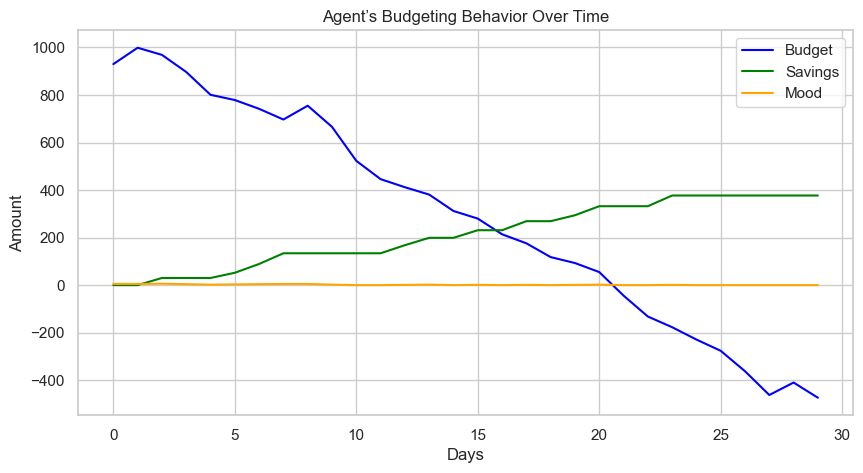

In [23]:
import random
import pandas as pd

# Behavioral finance parameters
LOSS_AVERSION_FACTOR = 1.5  # Loss is felt 1.5 times more than gain
DELAYED_GRATIFICATION_FACTOR = 0.5  # Rewards are discounted by 50% due to delayed gratification
RISK_TOLERANCE = 0.2  # The risk tolerance influences the decision to invest/spend

# Simulation parameters
INITIAL_BUDGET = 1000
SAVINGS_GOAL = 500  # A goal the agent aims to save
MAX_DAYS = 30

class BudgetAgent:
    def __init__(self):
        self.budget = INITIAL_BUDGET
        self.savings = 0
        self.debt = 0
        self.streak = 0
        self.mood = 7  # Scale 0-10
        self.overconfidence = 0  # Scale 0-1 (influences risky behavior)
        self.history = []

    def save_money(self):
        """The agent decides to save some money. This rewards future action but with delayed gratification."""
        saving_amount = random.randint(20, 50)
        reward = saving_amount * DELAYED_GRATIFICATION_FACTOR
        self.savings += saving_amount
        self.budget -= saving_amount
        self.streak += 1
        self.mood = min(10, self.mood + 1)  # Improved mood from saving
        self.overconfidence = max(0, self.overconfidence - 0.05)  # Reduces overconfidence slightly after saving
        return f"Saved ₹{saving_amount}. Reward will be received later.", reward

    def spend_money(self):
        """The agent decides to spend money. This comes with risk and potential for negative consequences."""
        spending_amount = random.randint(50, 100)
        self.budget -= spending_amount
        loss = spending_amount * LOSS_AVERSION_FACTOR
        self.mood = max(0, self.mood - 2)  # Negative mood after spending
        self.overconfidence = max(0, self.overconfidence - 0.1)  # Decrease overconfidence with negative behavior
        return f"Spent ₹{spending_amount}", -loss

    def handle_random_event(self):
        """Random events (like economic downturns) can affect the agent’s financial health."""
        event_type = random.choice(["economic_shock", "investment"])
        if event_type == "economic_shock":
            shock_amount = random.randint(50, 150)
            self.budget -= shock_amount
            self.mood = max(0, self.mood - 3)  # Economic shocks lead to lower mood
            return f"Random Event: Economic condition changed - ₹{shock_amount}", -shock_amount
        elif event_type == "investment":
            # Simulate an investment with risk
            investment_return = random.choice([random.uniform(0.5, 1.5), random.uniform(-0.5, -1.5)])
            investment_amount = random.randint(30, 100)
            self.budget += investment_return * investment_amount
            return f"Investment return: ₹{investment_return * investment_amount:.2f}", investment_return * investment_amount

    def update_overconfidence(self):
        """Overconfidence grows after successes, shrinks after failures."""
        if self.savings > 0 and random.random() < self.overconfidence:
            # Overconfident decision-making (e.g., risky spending or investing)
            self.spend_money()  # This is an overconfident move leading to a loss
        elif self.savings == 0 and random.random() < 0.05:
            # Small chance of conservative behavior if the agent is struggling
            self.save_money()

    def step(self):
        """Agent takes an action based on its current state (save, spend, or random event)."""
        action_choice = random.random()

        if action_choice < 0.4:  # 40% chance to save money
            event, reward = self.save_money()
        elif action_choice < 0.7:  # 30% chance to spend money
            event, reward = self.spend_money()
        else:  # 30% chance to encounter a random event
            event, reward = self.handle_random_event()

        self.history.append({
            "day": len(self.history),
            "budget": self.budget,
            "savings": self.savings,
            "debt": self.debt,
            "streak": self.streak,
            "mood": self.mood,
            "event": event,
            "reward": reward,
            "overconfidence": self.overconfidence,
        })

        self.update_overconfidence()

# Simulate the agent's budgeting behavior over 30 days
agent = BudgetAgent()
for day in range(MAX_DAYS):
    agent.step()

# Convert the history into a DataFrame for analysis
df = pd.DataFrame(agent.history)

# Display sample output
print(df.head())

# Optionally, visualize the agent's progress over time (e.g., mood, budget, savings)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['day'], df['budget'], label='Budget', color='blue')
plt.plot(df['day'], df['savings'], label='Savings', color='green')
plt.plot(df['day'], df['mood'], label='Mood', color='orange')
plt.xlabel('Days')
plt.ylabel('Amount')
plt.title('Agent’s Budgeting Behavior Over Time')
plt.legend()
plt.show()


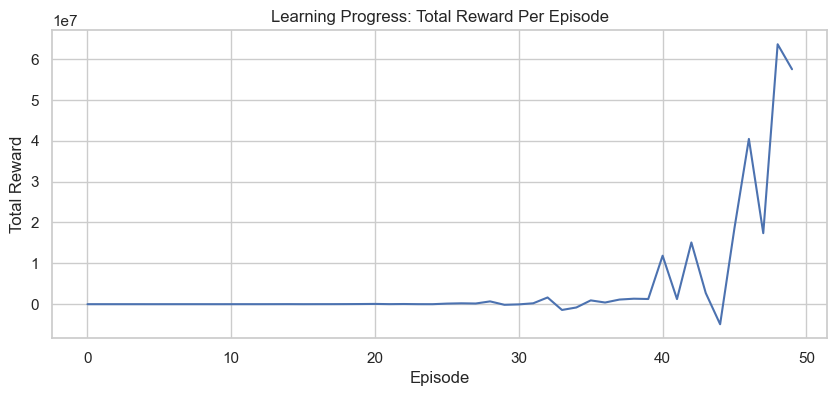

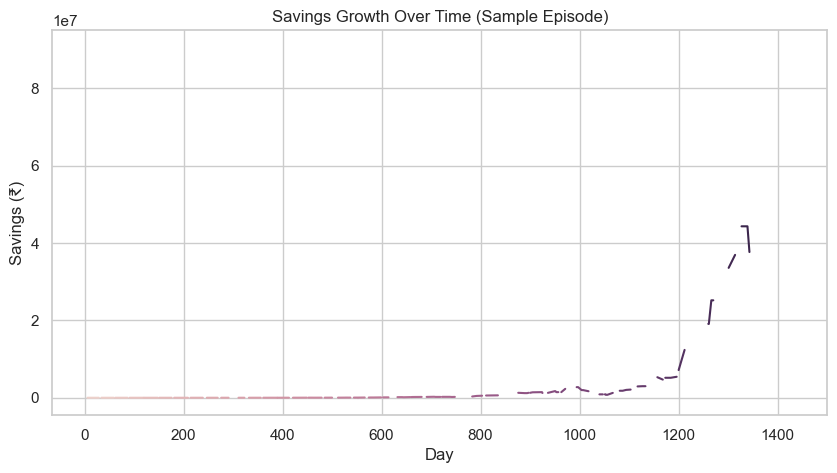

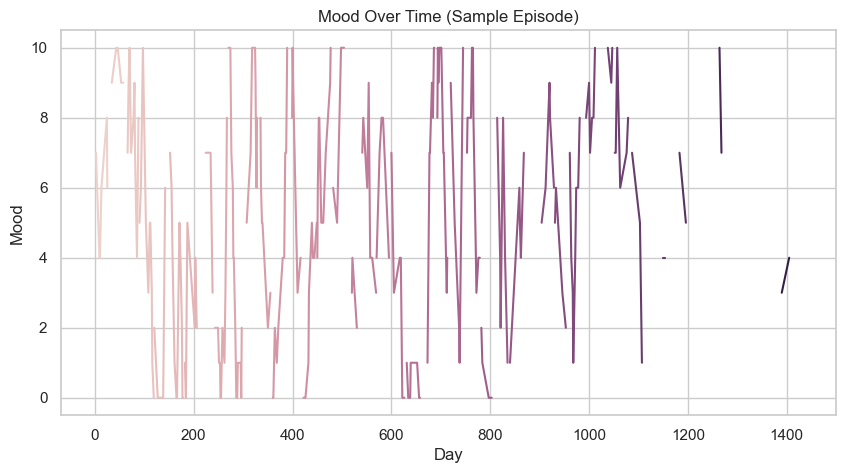

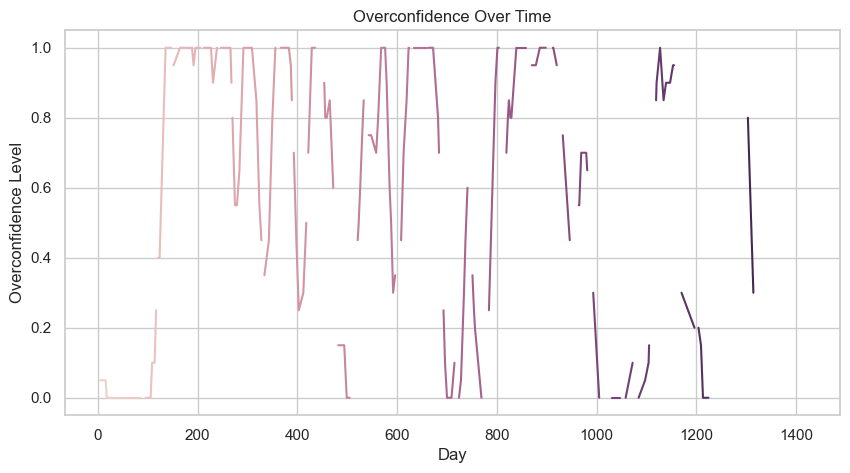


Sample Episode Log:
   day  budget  savings  debt  streak  mood  \
0    0   935.0      0.0     0       0     7   
1    1   935.0      0.0     0       0     7   
2    2   887.0     48.0     0       1     7   
3    3   837.0     48.0     0       0     5   
4    4   758.0     48.0     0       0     3   
5    5   808.0     48.0     0       0     5   
6    6   808.0     48.0     0       0     5   
7    7   858.0     48.0     0       0     4   
8    8   768.0     48.0     0       0     4   
9    9   768.0     48.0     0       0     4   

                                      event  reward  episode  overconfidence  
0                                 Spent ₹65   -32.5        0            0.00  
1                         No debt to handle     0.0        0            0.00  
2                                 Saved ₹48    24.0        0            0.00  
3  Random Event: Economic condition changed   -50.0        0            0.00  
4                                 Spent ₹79   -39.5        0      

In [25]:
#can you refine this code for gamified learning of personal financing and budgeting using Reinforcement learning. I want to make it visually appealing, render it in proper format, wrap it in a dashboard or playing game interface. Just beautify, add more code, to build narratives and explanations, suitable, for the game. Code so far: import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Game Setup - Agent Class
class BudgetAgent:
    def __init__(self, budget=1000, savings=0, mood=5, debt=0, streak=0, overconfidence=0):
        self.budget = budget  # Initial budget
        self.savings = savings  # Initial savings
        self.mood = mood  # Mood of the agent (0 to 10)
        self.debt = debt  # Initial debt
        self.streak = streak  # Streak for saving money
        self.history = []  # Track the agent's actions
        self.episode = 0  # Track the episode number
        self.time = 0  # Track the current time (day/month)
        self.overconfidence = overconfidence  # Agent's tendency to take financial risks due to overconfidence
        self.financial_goal = random.choice(['save', 'debt-free', 'invest'])  # Long-term goal of the agent

    def take_action(self, action):
        """
        Action can be:
        0 -> Spend Money
        1 -> Save Money
        2 -> Invest
        3 -> Handle Debt
        4 -> Random Event (e.g., economic conditions)
        """
        if action == 0:  # Spend money
            spent_amount = random.randint(20, 100)
            if self.overconfidence > 0.7:  # Overconfident agents may overspend
                spent_amount *= 1.2  # Spend more due to overconfidence
            self.budget -= spent_amount
            reward = -spent_amount / 2  # Negative reward for spending money
            event = f"Spent ₹{spent_amount}"
        elif action == 1:  # Save money
            saved_amount = random.randint(10, 50)
            self.savings += saved_amount
            self.budget -= saved_amount
            reward = saved_amount / 2  # Positive reward for saving money
            event = f"Saved ₹{saved_amount}"
        elif action == 2:  # Invest money
            # Risk-based returns: higher risk investments have larger fluctuations
            risk_factor = random.uniform(0, 1) + self.overconfidence * 0.2  # Overconfidence increases risk-taking
            if risk_factor < 0.5:  # Low risk investment (e.g., bonds)
                investment = random.choice([0.02, 0.05])  # Return on investment (low risk)
            else:  # High-risk investment (e.g., stocks)
                investment = random.choice([0.1, 0.2, -0.15])  # Return on investment (high risk)
            
            reward = investment * self.savings
            self.savings += reward
            if reward > 0:
                event = f"Investment grew by ₹{reward}"
            else:
                event = f"Investment lost ₹{abs(reward)}"
        elif action == 3:  # Handle debt
            if self.debt > 0:
                repayment = min(self.debt, random.randint(50, 200))  # Repay debt
                self.debt -= repayment
                reward = repayment / 2  # Positive reward for repaying debt
                event = f"Repayed ₹{repayment} of debt"
            else:
                reward = 0
                event = "No debt to handle"
        else:  # Random event (economic conditions, mood)
            event = "Random Event: Economic condition changed"
            reward = random.choice([-50, 50])  # Positive or negative economic impact
            self.budget += reward

        # Adjust mood and streak based on actions
        self.mood = max(0, min(10, self.mood + random.randint(-2, 2)))  # Gradual mood change, small variance
        if action == 1:
            self.streak = self.streak + 1 if self.streak < 5 else 5  # Saving for 5 days increases streak
        else:
            self.streak = 0  # Reset streak on non-saving actions

        # Add psychological factors
        if self.mood < 4:  # Poor mood may increase overconfidence or risk-taking
            self.overconfidence = min(1, self.overconfidence + 0.05)  # Increased overconfidence due to poor mood
        elif self.mood > 7:  # Good mood reduces overconfidence
            self.overconfidence = max(0, self.overconfidence - 0.05)

        # Track the actions and results
        self.history.append({
            'day': self.time,
            'budget': self.budget,
            'savings': self.savings,
            'debt': self.debt,
            'streak': self.streak,
            'mood': self.mood,
            'event': event,
            'reward': reward,
            'episode': self.episode,
            'overconfidence': self.overconfidence
        })
        self.time += 1

# Simulation Function - Reinforcement Learning Simulation
def train_agent(episodes=50):
    agent = BudgetAgent()  # Create a new agent
    rewards = []  # Track the total rewards for each episode
    history_df = pd.DataFrame()  # Store the history of actions in the simulation

    for episode in range(episodes):
        agent.episode = episode  # Set the current episode
        total_reward = 0  # Track the total reward for this episode
        for day in range(30):  # Simulate 30 days per episode
            action = random.choice([0, 1, 2, 3, 4])  # Random action: spend, save, invest, handle debt, or random event
            agent.take_action(action)  # Agent takes action
            total_reward += agent.history[-1]['reward']  # Add reward from this action

        rewards.append(total_reward)  # Save the total reward for the episode
        history_df = pd.concat([history_df, pd.DataFrame(agent.history)], ignore_index=True)  # Append the episode data

    return rewards, history_df

# Visualization Function - Display Results
def visualize_results(rewards, history_df):
    sns.set(style="whitegrid")
    
    # Total Reward per Episode (Learning Progress)
    plt.figure(figsize=(10, 4))
    plt.title("Learning Progress: Total Reward Per Episode")
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

    # Savings Growth Over Time (Sample)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='savings', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Savings Growth Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Savings (₹)")
    plt.show()

    # Mood Over Time (Sample Episode)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='mood', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Mood Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Mood")
    plt.show()

    # Overconfidence Over Time
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='overconfidence', hue='episode', data=history_df.sample(300), legend=False)
    plt.title("Overconfidence Over Time")
    plt.xlabel("Day")
    plt.ylabel("Overconfidence Level")
    plt.show()

    # Display Sample Episode Log (First 10 Days of Episode 0)
    print("\nSample Episode Log:")
    print(history_df[history_df['episode'] == 0].head(10))

# Run the Simulation and Visualize Results
rewards, history_df = train_agent(episodes=50)
visualize_results(rewards, history_df)

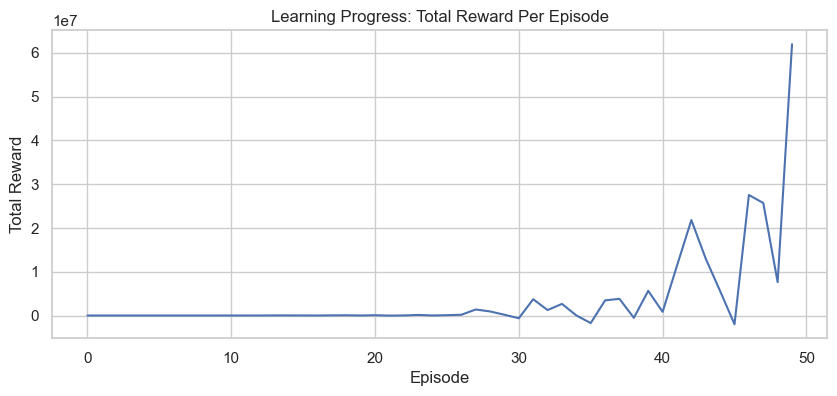

ValueError: Could not interpret value `day` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

In [27]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Game Setup - Agent Class
class BudgetAgent:
    def __init__(self, budget=1000, savings=0, mood=5, debt=0, streak=0, overconfidence=0):
        self.budget = budget  # Initial budget
        self.savings = savings  # Initial savings
        self.mood = mood  # Mood of the agent (0 to 10)
        self.debt = debt  # Initial debt
        self.streak = streak  # Streak for saving money
        self.history = []  # Track the agent's actions
        self.episode = 0  # Track the episode number
        self.time = 0  # Track the current time (day/month)
        self.overconfidence = overconfidence  # Agent's tendency to take financial risks due to overconfidence
        self.financial_goal = random.choice(['save', 'debt-free', 'invest'])  # Long-term goal of the agent

        # Q-learning related
        self.q_table = {}  # Q-table to store state-action values
        self.actions = [0, 1, 2, 3, 4]  # Possible actions
        self.learning_rate = 0.1  # Alpha (Learning rate)
        self.discount_factor = 0.9  # Gamma (Discount factor)
        self.exploration_rate = 1.0  # Epsilon (Exploration rate)
        self.exploration_decay = 0.995  # Decay for exploration over time
        self.min_exploration_rate = 0.01  # Minimum exploration rate

    def get_state(self):
        """
        Define the state as a tuple of (budget, savings, debt, mood, overconfidence).
        """
        return (self.budget, self.savings, self.debt, self.mood, self.overconfidence)

    def choose_action(self, state):
        """
        Choose an action based on the exploration-exploitation trade-off.
        """
        if random.uniform(0, 1) < self.exploration_rate:  # Explore
            return random.choice(self.actions)
        else:  # Exploit
            return np.argmax(self.q_table.get(state, [0] * len(self.actions)))  # Select the action with the highest Q-value

    def update_q_table(self, state, action, reward, next_state):
        """
        Update the Q-table using the Q-learning formula.
        """
        current_q = self.q_table.get(state, [0] * len(self.actions))[action]
        max_next_q = max(self.q_table.get(next_state, [0] * len(self.actions)))
        new_q = current_q + self.learning_rate * (reward + self.discount_factor * max_next_q - current_q)
        
        # Update Q-table
        if state not in self.q_table:
            self.q_table[state] = [0] * len(self.actions)
        self.q_table[state][action] = new_q

    def take_action(self, action):
        """
        Action can be:
        0 -> Spend Money
        1 -> Save Money
        2 -> Invest
        3 -> Handle Debt
        4 -> Random Event (e.g., economic conditions)
        """
        if action == 0:  # Spend money
            spent_amount = random.randint(20, 100)
            if self.overconfidence > 0.7:  # Overconfident agents may overspend
                spent_amount *= 1.2  # Spend more due to overconfidence
            self.budget -= spent_amount
            reward = -spent_amount / 2  # Negative reward for spending money
            event = f"Spent ₹{spent_amount}"
        elif action == 1:  # Save money
            saved_amount = random.randint(10, 50)
            self.savings += saved_amount
            self.budget -= saved_amount
            reward = saved_amount / 2  # Positive reward for saving money
            event = f"Saved ₹{saved_amount}"
        elif action == 2:  # Invest money
            # Risk-based returns: higher risk investments have larger fluctuations
            risk_factor = random.uniform(0, 1) + self.overconfidence * 0.2  # Overconfidence increases risk-taking
            if risk_factor < 0.5:  # Low risk investment (e.g., bonds)
                investment = random.choice([0.02, 0.05])  # Return on investment (low risk)
            else:  # High-risk investment (e.g., stocks)
                investment = random.choice([0.1, 0.2, -0.15])  # Return on investment (high risk)
            
            reward = investment * self.savings
            self.savings += reward
            if reward > 0:
                event = f"Investment grew by ₹{reward}"
            else:
                event = f"Investment lost ₹{abs(reward)}"
        elif action == 3:  # Handle debt
            if self.debt > 0:
                repayment = min(self.debt, random.randint(50, 200))  # Repay debt
                self.debt -= repayment
                reward = repayment / 2  # Positive reward for repaying debt
                event = f"Repayed ₹{repayment} of debt"
            else:
                reward = 0
                event = "No debt to handle"
        else:  # Random event (economic conditions, mood)
            event = "Random Event: Economic condition changed"
            reward = random.choice([-50, 50])  # Positive or negative economic impact
            self.budget += reward

        # Adjust mood and streak based on actions
        self.mood = max(0, min(10, self.mood + random.randint(-2, 2)))  # Gradual mood change, small variance
        if action == 1:
            self.streak = self.streak + 1 if self.streak < 5 else 5  # Saving for 5 days increases streak
        else:
            self.streak = 0  # Reset streak on non-saving actions

        # Add psychological factors
        if self.mood < 4:  # Poor mood may increase overconfidence or risk-taking
            self.overconfidence = min(1, self.overconfidence + 0.05)  # Increased overconfidence due to poor mood
        elif self.mood > 7:  # Good mood reduces overconfidence
            self.overconfidence = max(0, self.overconfidence - 0.05)

        # Track the actions and results
        next_state = self.get_state()
        return reward, next_state, event

# Simulation Function - Reinforcement Learning Simulation
def train_agent(episodes=50):
    agent = BudgetAgent()  # Create a new agent
    rewards = []  # Track the total rewards for each episode
    history_df = pd.DataFrame()  # Store the history of actions in the simulation

    for episode in range(episodes):
        agent.episode = episode  # Set the current episode
        total_reward = 0  # Track the total reward for this episode
        for day in range(30):  # Simulate 30 days per episode
            state = agent.get_state()  # Get the current state
            action = agent.choose_action(state)  # Choose action based on exploration-exploitation
            reward, next_state, event = agent.take_action(action)  # Take action and get the result
            agent.update_q_table(state, action, reward, next_state)  # Update the Q-table
            total_reward += reward  # Add reward from this action

        rewards.append(total_reward)  # Save the total reward for the episode
        history_df = pd.concat([history_df, pd.DataFrame(agent.history)], ignore_index=True)  # Append the episode data

        # Decay exploration rate
        agent.exploration_rate = max(agent.min_exploration_rate, agent.exploration_rate * agent.exploration_decay)

    return rewards, history_df

# Visualization Function - Display Results
def visualize_results(rewards, history_df):
    sns.set(style="whitegrid")
    
    # Total Reward per Episode (Learning Progress)
    plt.figure(figsize=(10, 4))
    plt.title("Learning Progress: Total Reward Per Episode")
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

    # Savings Growth Over Time (Sample, ensure we have enough data)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='savings', hue='episode', data=history_df.sample(min(len(history_df), 300)), legend=False)
    plt.title("Savings Growth Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Savings (₹)")
    plt.show()

    # Mood Over Time (Sample Episode)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='mood', hue='episode', data=history_df.sample(min(len(history_df), 300)), legend=False)
    plt.title("Mood Over Time (Sample Episode)")
    plt.xlabel("Day")
    plt.ylabel("Mood")
    plt.show()

    # Overconfidence Over Time
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='day', y='overconfidence', hue='episode', data=history_df.sample(min(len(history_df), 300)), legend=False)
    plt.title("Overconfidence Over Time")
    plt.xlabel("Day")
    plt.ylabel("Overconfidence Level")
    plt.show()

    # Display Sample Episode Log (First 10 Days of Episode 0)
    print("\nSample Episode Log:")
    print(history_df[history_df['episode'] == 0].head(10))

# Run the Simulation and Visualize Results
rewards, history_df = train_agent(episodes=50)
visualize_results(rewards, history_df)

